EDA |     USUARIO614

In [2]:
#Comenzamos importando las librerías que vamos a utilizar

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
#Leemos los datasets con los que vamos a trabajar

df_reviews = pd.read_csv("df_user_reviews_desanidada_final.csv")
df_item = pd.read_parquet("df_final_sample.parquet")
df_steam = pd.read_csv("steam_games_final.csv")

In [4]:
df_reviews.head(3)

,user_id,user_url,sentiment_analysis,posted,item_id,recommend
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,2,2011-11-05,1250,1
1,js41637,http://steamcommunity.com/id/js41637,2,2014-06-24,251610,1
2,evcentric,http://steamcommunity.com/id/evcentric,2,NaT,248820,1


In [5]:
df_item.head(3)

,user_id,items_count,user_url,item_id,item_name,playtime_forever
0,76561198058972456,167,http://steamcommunity.com/profiles/76561198058...,39000,Moonbase Alpha,39.0
1,317984739321,75,http://steamcommunity.com/id/317984739321,212180,Combat Arms,0.0
2,76561198074760919,54,http://steamcommunity.com/profiles/76561198074...,365300,Transmissions: Element 120,1.0


In [6]:
# Verificar los valores únicos en la columna "price"
unique_prices = df_steam['price'].unique()
print(unique_prices)


['4.99' '0' '0.99' '3.99' '9.99' '18.99' '29.99' nan '10.99' '2.99'
 '1.5899999999999999' '14.99' '1.99' '59.99' '8.99' '6.99' '7.99' '39.99'
 '19.99' '7.49' '12.99' '5.99' '2.49' '15.99' '1.25' '24.99' '17.99'
 '61.99' '3.49' '11.99' '13.99' 'Play for Free!' '34.99' '1.49' '32.99'
 '99.99' '14.95' '69.99' '16.99' '79.99' '49.99' '5.0' '44.99' '13.98'
 '29.96' '119.99' '109.99' '149.99' '771.71' 'Install Now' '21.99' '89.99'
 '0.98' '139.92' '4.29' '64.99' '54.99' '74.99' '0.89' '0.5' '299.99'
 '1.29' '3.0' '15.0' '5.49' '23.99' '49.0' '20.99' '10.93'
 '1.3900000000000001' 'Free HITMAN™ Holiday Pack' '36.99' '4.49' '2.0'
 '4.0' '234.99' '1.9500000000000002' '1.5' '199.0' '189.0' '6.66' '27.99'
 '10.49' '129.99' '179.0' '26.99' '399.99' '31.99' '399.0' '20.0' '40.0'
 '3.33' '22.99' '320.0' '38.85' '71.7' '995.0' '27.49' '3.39' '6.0'
 '19.95' '499.99' '199.99' '16.06' '4.68' '131.4' '44.98' '202.76' '1.0'
 '2.3' '0.9500000000000001' '172.24' '249.99' '2.9699999999999998' '10.96'
 '10.0' 

In [7]:
#Limpiamos la columna "price" (reemplazamos comas y caracteres no numéricos)
df_steam['price'] = df_steam['price'].str.replace(',', '', regex=True)
df_steam['price'] = pd.to_numeric(df_steam['price'], errors='coerce')


In [19]:
# Creamos una tabla dinámica para calcular el precio promedio por género
pivot_table = df_steam.pivot_table(index='genres', values='price', aggfunc='mean')

# Ordenamos la tabla dinámica por precio promedio
pivot_table = pivot_table.sort_values(by='price', ascending=False)

# Tomamos solo los 10 géneros principales
top_10_genres = pivot_table.head(10)


,price
genres,
"['Animation &amp; Modeling', 'Design &amp; Illustration', 'Utilities', 'Web Publishing']",289.990000
"['Animation &amp; Modeling', 'Design &amp; Illustration', 'Education', 'Utilities']",274.990000
"['Animation &amp; Modeling', 'Design &amp; Illustration', 'Education', 'Utilities', 'Web Publishing']",262.490000
"['Audio Production', 'Video Production']",224.495000
"['Action', 'Free to Play', 'Indie', 'Sports', 'Strategy', 'Early Access']",189.960000
"['Animation &amp; Modeling', 'Design &amp; Illustration', 'Education', 'Software Training', 'Video Production', 'Web Publishing']",179.000000
"['Design &amp; Illustration', 'Photo Editing', 'Software Training', 'Utilities', 'Video Production']",129.990000
"['Animation &amp; Modeling', 'Education', 'Utilities', 'Web Publishing']",124.434444
"['Animation &amp; Modeling', 'Design &amp; Illustration']",102.685000


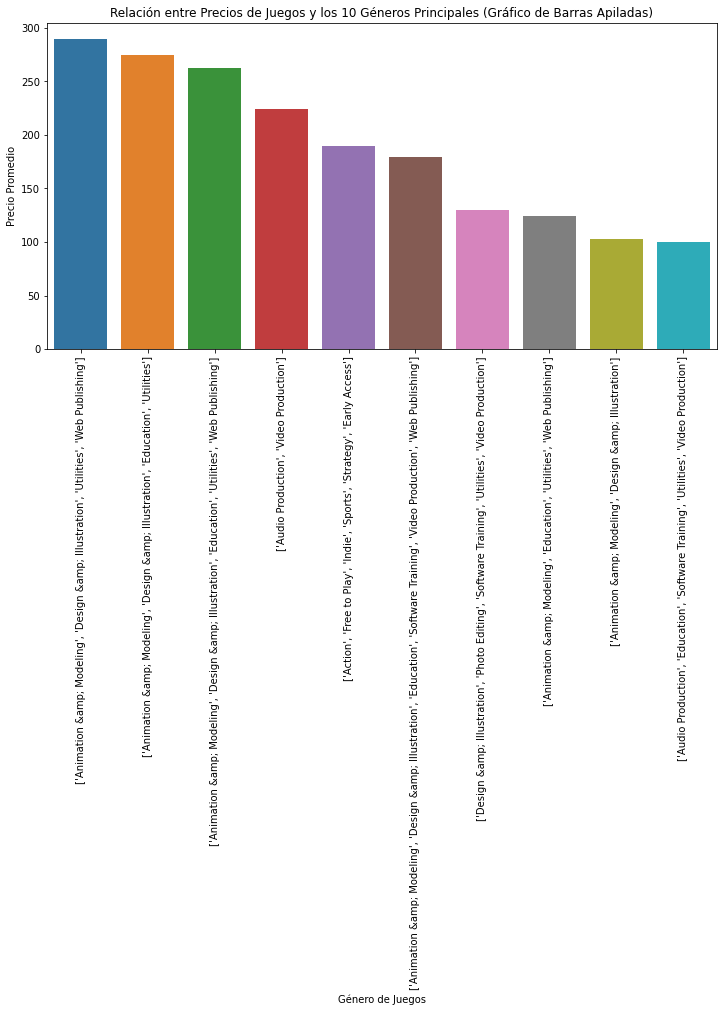

In [9]:

# Creamos un gráfico de barras apiladas para los 10 géneros principales
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_genres, x=top_10_genres.index, y='price')
plt.xticks(rotation=90)
plt.xlabel('Género de Juegos')
plt.ylabel('Precio Promedio')
plt.title('Relación entre Precios de Juegos y los 10 Géneros Principales (Gráfico de Barras Apiladas)')
plt.show()


In [ ]:
#'Animation & Modeling', 'Design & Illustration', 'Utilities', 'Web Publishing' (289.99): Esta categoría de videojuegos es la más cara en la lista,
# lo que podría sugerir que incluye títulos de alta calidad y gran demanda. Los géneros relacionados con diseño,
# utilidades y publicación web pueden tener un público que está dispuesto a invertir mayor presupuesto en experiencias de juego creativas.
# Los géneros de videojuegos representan una variedad de temas y enfoques.
# Los precios varían, lo que refleja la inversión requerida para acceder a estas experiencias.
# Cada categoría puede atraer a diferentes audiencias según sus preferencias y presupuestos.

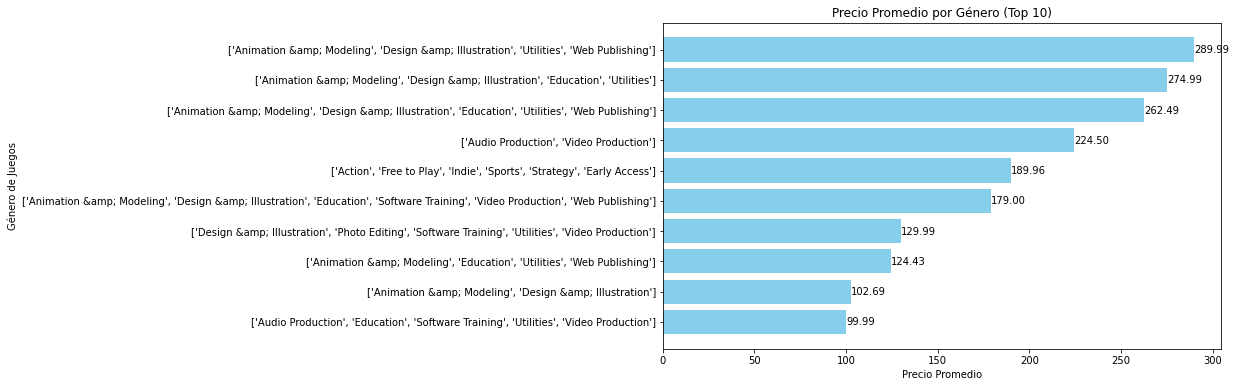

In [10]:

# Creamos un gráfico de barras horizontales
plt.figure(figsize=(10, 6))
plt.barh(top_10_genres.index, top_10_genres['price'], color='skyblue')
plt.xlabel('Precio Promedio')
plt.ylabel('Género de Juegos')
plt.title('Precio Promedio por Género (Top 10)')

# Agregamos etiquetas de precios en las barras
for index, value in enumerate(top_10_genres['price']):
    plt.text(value, index, f'{value:.2f}', ha='left', va='center')

plt.gca().invert_yaxis()  # Invertimos el eje 'y' para que el género con el precio más alto esté en la parte superior
plt.show()



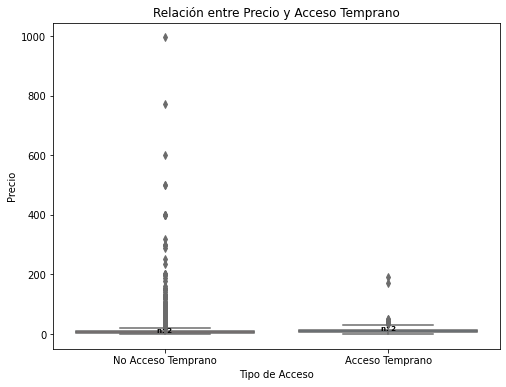

In [11]:
#Relación entre Precio y Acceso Temprano:

import matplotlib.pyplot as plt
import seaborn as sns

# Creamos un gráfico de caja mejorado para comparar precios con y sin acceso temprano
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_steam, x='early_access', y='price', palette=["#ff9999", "#66b3ff"])
plt.xticks(ticks=[0, 1], labels=['No Acceso Temprano', 'Acceso Temprano'])
plt.xlabel('Tipo de Acceso')
plt.ylabel('Precio')
plt.title('Relación entre Precio y Acceso Temprano')

# Agregamos etiquetas de precios en los boxplots
ax = plt.gca()
medians = df_steam.groupby(['early_access'])['price'].median().values
nobs = [str(len(x)) for x in df_steam.groupby(['early_access'])['price']]
nobs = ["n: " + i for i in nobs]
pos = range(len(nobs))
for tick, label in zip(pos, ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 1, nobs[tick], horizontalalignment='center', size='x-small', color='k', weight='semibold')

plt.show()


In [ ]:
# Los juegos sin acceso temprano tienden a ser más costosos en promedio, mientras que los juegos con acceso temprano suelen ser más asequibles.
# Esto puede deberse a diferentes estrategias de marketing y ventas,
# donde los desarrolladores pueden optar por atraer a los jugadores ofreciendo precios más bajos como incentivo
# para probar juegos antes de su lanzamiento oficial.
# Además, los valores atípicos en la categoría "No Acceso Temprano" sugieren la existencia de juegos premium que justifican precios más elevados.
# El gráfico ofrece una visión valiosa de cómo los precios y las opciones de acceso temprano se entrelazan en la industria de los videojuegos.

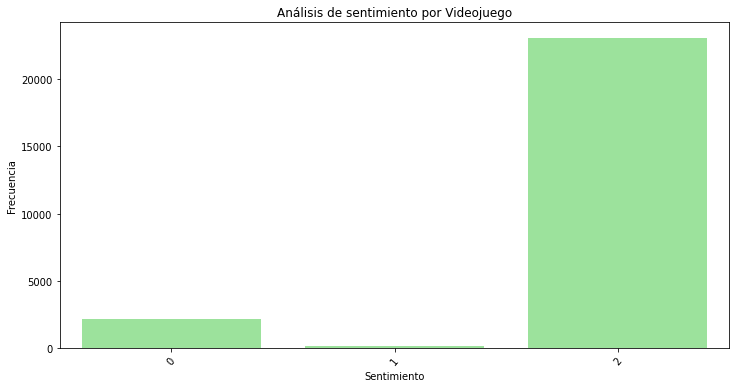

In [18]:
# Analizamos la distribución del análisis de sentimiento

Analisis_sentimiento = df_reviews['sentiment_analysis'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.barplot(x=Analisis_sentimiento.index, y=Analisis_sentimiento.values, color='lightgreen')
plt.xticks(rotation=50)

plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')
plt.title('Análisis de sentimiento por Videojuego')

plt.show()

In [ ]:
# La distribución del análisis de sentimiento en las reseñas de videojuegos refleja una tendencia general hacia sentimientos positivos, 
# con una minoría de reseñas negativas y una cantidad relativamente menor de reseñas con sentimiento neutral. Esto sugiere que, en su conjunto, 
# los jugadores tienden a expresar opiniones favorables en sus reseñas de videojuegos,
# lo que es una señal alentadora para la industria y los desarrolladores de juegos.

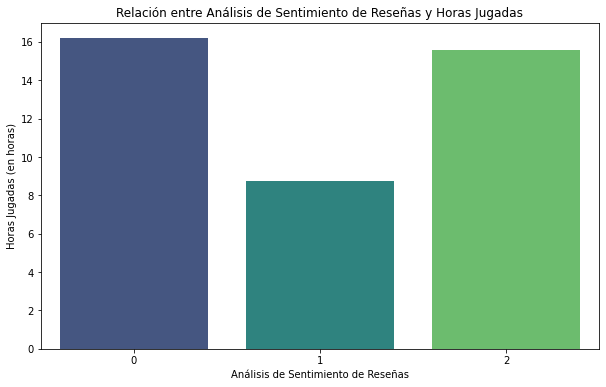

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtramos el DataFrame para incluir solo los valores 0, 1 y 2 en la columna "sentiment_analysis"
filtered_df_reviews = df_reviews[df_reviews['sentiment_analysis'].isin([0, 1, 2])]

# Convertimos la columna 'item_id' a tipo de datos int64 en ambos DataFrames
filtered_df_reviews['item_id'] = pd.to_numeric(filtered_df_reviews['item_id'], errors='coerce')
df_item['item_id'] = pd.to_numeric(df_item['item_id'], errors='coerce')

# Eliminamos filas con valores nulos en la columna 'item_id'
filtered_df_reviews = filtered_df_reviews.dropna(subset=['item_id'])
df_item = df_item.dropna(subset=['item_id'])

# Creamos un DataFrame combinado con pd.concat
merged_df = pd.concat([filtered_df_reviews, df_item], axis=1, join='inner')

# Convertimos la columna 'playtime_forever' de minutos a horas y redondear a la decena más cercana
merged_df['playtime_hours'] = (merged_df['playtime_forever'] / 60).round(-1)

# Creamos un gráfico de barras para mostrar el promedio de horas jugadas por categoría de análisis de sentimiento
plt.figure(figsize=(10, 6))
sns.barplot(data=merged_df, x='sentiment_analysis', y='playtime_hours', ci=None, palette='viridis')

plt.xlabel('Análisis de Sentimiento de Reseñas')
plt.ylabel('Horas Jugadas (en horas)')
plt.title('Relación entre Análisis de Sentimiento de Reseñas y Horas Jugadas')

plt.show()




In [ ]:
# El análisis sugiere que el sentimiento positivo puede estar relacionado con juegos que no requieren tanto tiempo para completar,
# mientras que las reseñas negativas pueden estar relacionadas con juegos que involucran más horas de juego. 

In [ ]:
# Utilizaré la biblioteca scikit-learn para calcular la similitud del coseno entre juegos basándome en características como género, tema, reseñas, etc

In [23]:
# Combinamos las características de género y etiquetas en una sola columna
df_steam['combined_features'] = df_steam['genres'] + " " + df_steam['tags']

# Mostramos las primeras filas de la columna combinada
print(df_steam['combined_features'].head())


0    ['Action', 'Casual', 'Indie', 'Simulation', 'S...
1    ['Free to Play', 'Indie', 'RPG', 'Strategy'] [...
2    ['Casual', 'Free to Play', 'Indie', 'Simulatio...
3    ['Action', 'Adventure', 'Casual'] ['Action', '...
4    ['Action', 'Adventure', 'Simulation'] ['Action...
Name: combined_features, dtype: object


In [ ]:
#Para calcular la similitud del coseno, utilizaremos la función CountVectorizer de scikit-learn para convertir las características de texto
# en vectores numéricos y luego aplicaremos la función cosine_similarity para calcular la similitud

In [25]:
# Reemplazamos valores NaN en las columnas 'genres' y 'tags' con cadenas vacías
df_steam['genres'].fillna('', inplace=True)
df_steam['tags'].fillna('', inplace=True)

# Combinar las características de género y etiquetas en una sola columna
df_steam['combined_features'] = df_steam['genres'] + ' ' + df_steam['tags']

# Inicializar el objeto CountVectorizer
cv = CountVectorizer()

# Obtener la matriz de características
feature_matrix = cv.fit_transform(df_steam['combined_features'])

# Calcular la similitud del coseno entre juegos
cosine_sim = cosine_similarity(feature_matrix)

# Mostrar la matriz de similitud del coseno
print(cosine_sim)



[[1.         0.232889   0.49827288 ... 0.77459667 0.51639778 0.51639778]
 [0.232889   1.         0.38680758 ... 0.30065841 0.15032921 0.15032921]
 [0.49827288 0.38680758 1.         ... 0.42884501 0.42884501 0.42884501]
 ...
 [0.77459667 0.30065841 0.42884501 ... 1.         0.33333333 0.66666667]
 [0.51639778 0.15032921 0.42884501 ... 0.33333333 1.         0.33333333]
 [0.51639778 0.15032921 0.42884501 ... 0.66666667 0.33333333 1.        ]]


In [27]:
#Creamos la función que nos va a recomendar juegos similares

def recomendacion_juego(id_juego):
    # Obtiene el índice del juego de entrada
    idx = df_steam[df_steam['id'] == id_juego].index[0]

    # Obtiene la similitud del juego de entrada con todos los demás juegos
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Ordena los juegos por similitud en orden descendente
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Obtiene los índices de los juegos recomendados (excluyendo el juego de entrada)
    top_indices = [i for i, _ in sim_scores[1:6]]

    # Obtiene los nombres de los juegos recomendados
    recommended_games = df_steam['game_name'].iloc[top_indices]

    return recommended_games
